# <center> MATH&ML-9. Математика ансамблевых методов
---

### 2. Ансамбли моделей. Бутстреппинг. Бэггинг

In [174]:
# Задание 2.7
# Подготовьте данные к классификации. Условно разделите вино на хорошее и плохое. Хорошим вином будем называть то, параметр quality которого — 6 и более
# Разделите выборку на обучающую и тестовую в соотношении 70/30, в качестве значения параметра random_state возьмите число 42
# Для начала обучите два классификатора: логистическую регрессию (с параметрами по умолчанию) и дерево решений (random_state = 42, максимальная глубина — 10)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

wine_df = pd.read_csv('data/wineQualityReds.csv')
wine_df['class'] = wine_df['quality'].apply(lambda x: 1 if x>=6 else 0)

X = wine_df.drop(['quality', 'class'], axis=1)
y = wine_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_test_pred_lgr = lgr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=10, random_state=42)
dtc.fit(X_train, y_train)
y_test_pred_dtc = dtc.predict(X_test)

print(f'Logistic Regression f1-score: {metrics.f1_score(y_test, y_test_pred_lgr):.3f}')
print(f'Decision Tree Classifier f1-score: {metrics.f1_score(y_test, y_test_pred_dtc):.3f}')

Logistic Regression f1-score: 0.739
Decision Tree Classifier f1-score: 0.760


c:\Users\Blooodniy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [175]:
# Задание 2.8
# Обучите модель с использованием бэггинга (класс BaggingClassifier с random_state=42)
# Возьмите из предыдущего задания алгоритм, показавший наилучшее качество, и укажите для него новое количество моделей — 1500. Вычислите новое значение F1-score
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10, 
                                                        random_state=42),
                       n_estimators=1500,
                       random_state=42)
bc.fit(X_train, y_train)
y_test_pred_bc = bc.predict(X_test)
print(f'Bagging Classifier f1-score: {metrics.f1_score(y_test, y_test_pred_bc):.3f}')

Bagging Classifier f1-score: 0.824


---

### 3. Случайный лес

In [176]:
# Задание 3.4
# 1. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70/30, при разбиении задайте параметр random_state = 13
# Какое получилось среднее значение медианных цен на обучающей выборке? Ответ округлите до двух знаков после точки-разделителя
boston_df = pd.read_csv('data/boston (1).csv')
# Преобразуем в числовой формат, предварительно заменив десятичнй разделитель
boston_df = boston_df.apply(lambda col: pd.to_numeric(col.str.replace(',', '.')) if col.dtype=='object' else col)
X = boston_df.drop('target', axis=1)
y = boston_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
print(f'1. {y_train.mean():.2f}')

# 2. Обучите линейную регрессию с параметрами по умолчанию
# В качестве ответа введите ошибку MAE на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя
from sklearn.linear_model import LinearRegression

lnr = LinearRegression()
lnr.fit(X_train, y_train)
y_test_pred_lnr = lnr.predict(X_test)
print(f'2. {metrics.mean_absolute_error(y_test, y_test_pred_lnr):.2f}')

# 3. Обучите решающее дерево с параметрами по умолчанию и аргументом random_state = 13
# Можно ли, опираясь на результаты, сделать вывод, что алгоритм переобучился?
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=13)
dtr.fit(X_train, y_train)
y_train_pred_dtr = dtr.predict(X_train)
y_test_pred_dtr = dtr.predict(X_test)
print(f'3. MAE train: {metrics.mean_absolute_error(y_train, y_train_pred_dtr):.2f}, MAE test: {metrics.mean_absolute_error(y_test, y_test_pred_dtr):.2f}')

# 4. Обучите четыре случайных леса с числом деревьев 3, 10, 100, 500 и параметром random_state = 13
# В качестве ответа введите наименьшую полученную ошибку MAE на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.
from sklearn.ensemble import RandomForestRegressor
n_estimators = [3, 10, 100, 500]
mae = []
for n in n_estimators:
    rfr = RandomForestRegressor(n_estimators=n, random_state=13)
    rfr.fit(X_train, y_train)
    y_test_pred_rfr = rfr.predict(X_test)
    mae.append(metrics.mean_absolute_error(y_test, y_test_pred_rfr))
print(f'4. {min(mae):.2f}')

1. 22.77
2. 3.72
3. MAE train: 0.00, MAE test: 2.84
4. 2.24


---

### 4. Случайный лес. Практика

* `Date` — дата, в которую зафиксировано наблюдение;
* `Location` — местонахождение метеорологической станции;
* `MinTemp` — минимальная температура (℃);
* `MaxTemp` — максимальная температура (℃);
* `Rainfall` — количество осадков (дождь) за сутки (мм);
* `Evaporation` — количество испарений до 9 утра (мм);
* `Sunshine` — количество часов в сутках, когда светило солнце;
* `WindGustDir` — направление самого сильного порыва ветра за последние 24 часа;
* `WindGustSpeed` — скорость самого сильного порыва ветра за последние 24 часа;
* `WindDir9am` — направление ветра в 9 утра;
* `WindDir3pm` — направление ветра в 3 часа дня;
* `WindSpeed9am` — скорость ветра в 9 часов утра;
* `WindSpeed3pm` — скорость ветра в 3 часа дня;
* `Humidity9am` — влажность в 9 утра;
* `Humidity3pm` — влажность в 3 часа дня;
* `Pressure9am` — атмосферное давление в 9 утра;
* `Pressure3pm` — атмосферное давление в 3 часа дня;
* `Cloud9am` — часть неба, закрытая облаками, в 9 утра;
* `Cloud3pm` — часть неба, закрытая облаками, в 3 часа дня;
* `Temp9am` — температура в 9 утра;
* `Temp3pm` — температура в 3 часа дня;
* `RainToday` — наличие дождя в этот день;
* `RainTomorrow` — наличие дождя на следующий день.

In [177]:
weather_df = pd.read_csv('data/weatherAUS.csv')
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [178]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [179]:
# Задание 4.1
# Сколько суммарно пропусков в данных?
weather_df.isnull().sum().sum()

343248

In [180]:
# Задание 4.2
# В некоторых признаках пропусков более 40 % — удалите такие признаки. Сколько их было?
drop = weather_df.dropna(axis=1, thresh=0.6*weather_df.shape[0])
print(weather_df.shape[1] - drop.shape[1])
weather_df = drop

3


In [181]:
# Задание 4.3
# Теперь обработаем признаки RainToday и RainTomorrow таким образом, чтобы вместо yes было значение 1, а вместо no — значение 0
# Обратите внимание на то, что в признаках RainToday и RainTomorrow присутствуют пропуски, и их трогать не нужно, они должны остаться пропусками
# Поэтому обрабатывайте столбцы таким образом, чтобы не видоизменить пропущенные значения
weather_df.loc[:, 'RainToday'] = weather_df['RainToday'].apply(lambda x: 1 if x=='Yes' else (0 if x=='No' else x))
weather_df.loc[:, 'RainTomorrow'] = weather_df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else (0 if x=='No' else x))

# Вычислите среднее арифметическое для преобразованного признака RainToday и запишите его в ответ, предварительно округлив до двух знаков после точки-разделителя
round(weather_df['RainToday'].mean(), 2)

0.22

In [182]:
# Задание 4.4
# Обработайте признак Date таким образом, чтобы выделить в отдельный признак Month (номер месяца)
weather_df.loc[:, 'Month'] = pd.to_datetime(weather_df['Date']).dt.month

# Изначальный признак Date удалите. Определите, какой месяц имеет самую большую часть дождливых дней относительно всех дней месяца
weather_df = weather_df.drop('Date', axis=1)

# В качестве ответа введите порядковый номер месяца
weather_df.groupby(['Month'])['RainToday'].mean().sort_values(ascending=False).index[0]

7

In [183]:
# Задание 4.5
# Обработайте оставшиеся категориальные признаки
# С помощью метода get_dummies с настройками по умолчанию создайте dummy-переменные для всех категориальных признаков (их пять), которые есть в данных на этот момент
# Кодировку признаков важно выполнить именно в следующем порядке: 
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
# Это необходимо для того, чтобы ваши дальнейшие ответы сходились с нашим решением, так как алгоритм случайного леса, 
# который мы будем использовать в дальнейшем, чувствителен к порядку столбцов
# Аргумент categoricals передаётся в функцию pd.get_dummies() с использованием ключевого слова columns, а именно columns=categoricals
weather_df = pd.get_dummies(weather_df, columns=categoricals)

# Сколько теперь признаков в данных, если считать целевую переменную?
weather_df.shape[1]

124

In [184]:
# Задание 4.6
# Осталось совсем немного. Удалите все строки, где есть пропуски
weather_df = weather_df.dropna(axis=0, how='any')

# Далее разбейте данные на обучающую и тестовую выборки в соотношении 70/30, в качестве значения параметра random_state возьмите число 31
X = weather_df.drop('RainTomorrow', axis=1)
y = weather_df['RainTomorrow'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

# Каково среднее значение целевой переменной на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя
round(y_test.mean(), 2)

0.23

In [185]:
# Задание 4.7
# Теперь давайте вспомним про бутстреп. Он не понадобится нам для решения этой задачи, но будет полезно реализовать его «вручную»
# Сделайте оценку стандартного отклонения для среднего значения минимальной температуры для обучающей выборки (то есть для среднего значения по признаку MinTemp)
# Для этого сгенерируйте 1000 случайных выборок из наших данных — каждая из них должна быть такого же объёма, как и обучающая выборка
# Для генерации выборки используйте np.random.randint(): сгенерируйте необходимое количество индексов и по ним извлеките соответствующие элементы выборки
# Случайность фиксируйте с помощью np.random.seed(31)
# Для каждой выборки вычислите среднее значение, а после найдите стандартное отклонение для этих значений. Ответ округлите до двух знаков после точки-разделителя
n = X_train.shape[0]
np.random.seed(31)
indices = np.random.randint(0, n, (n, 1000))
means = []
for i in range(1000):
    bootstrap = X_train['MinTemp'].iloc[indices[:, i]]
    means.append(bootstrap.mean())
round(np.std(means), 2)

0.03

In [186]:
# Задание 4.8
# Теперь можно перейти к обучению прогностических моделей. Начнём с того, что построим простейшую логистическую регрессию (без настройки гиперпараметров)
# Это будет та модель, с качеством которой мы будем сравнивать результаты, полученные далее
# В качестве ответа введите значение метрики roc_auc на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_test_pred_lgr = lgr.predict(X_test)
round(metrics.roc_auc_score(y_test, y_test_pred_lgr), 2)

c:\Users\Blooodniy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.73

In [187]:
# Задание 4.9
# Теперь попробуйте обучить на наших данных другой алгоритм — дерево решений. С помощью GridSearchCV сделайте перебор гиперпараметров по следующей сетке:
params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth': [5,7,9,11]}
# Для параметра кросс-валидации cv задайте значение 3. Для решающего дерева определите параметр random_state=42. Остальные параметры оставьте по умолчанию
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(param_grid=params,
                    estimator=DecisionTreeClassifier(random_state=42), 
                    cv=3)
gscv.fit(X_train, y_train)

# 1. Вычислите значение roc_auc для решающего дерева с гиперпараметрами, определёнными в качестве оптимальных. Ответ округлите до двух знаков после точки-разделителя
y_test_pred_gscv = gscv.best_estimator_.predict(X_test)
print(round(metrics.roc_auc_score(y_test, y_test_pred_gscv), 2))

# 2. Какие значения гиперпараметров были выбраны как оптимальные?
gscv.best_params_

0.7


{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}

In [188]:
# Задание 4.10
# К сожалению, деревья решений не помогли нам в улучшении качества модели, так что попробуем ещё уменьшить ошибку с помощью ансамблей
# Теперь постройте случайный лес, включающий 100 деревьев. Задайте параметр random_state=31. Остальные параметры оставьте по умолчанию
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=31)
rfc.fit(X_train, y_train)

# Какой теперь будет метрика roc_auc на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя
y_test_perd_rfc = rfc.predict(X_test)
round(metrics.roc_auc_score(y_test, y_test_perd_rfc), 2)

0.73

In [189]:
# Задание 4.11
# Основные параметры, которые отвечают за качество обучения в случайном лесе, следующие:'max_features', 'min_samples_leaf', 'max_depth'
# Возьмите случайный лес из 100 деревьев и найдите оптимальную комбинацию этих трёх параметров. Сетка для перебора следующая:
grid = {'max_features': [ 4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}

# Перебор осуществите с помощью GridSearchCV. Для параметра кросс-валидации cv задайте значение 3. Случайности фиксируйте параметром random_state = 31
# Остальные значения оставьте по умолчанию
gs_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=31),
                      param_grid=grid,
                      cv=3) 
gs_rfc.fit(X_train, y_train)

# Какое значение roc_auc получилось для оптимальных гиперпараметров?
gs_rfc_best = RandomForestClassifier(**gs_rfc.best_params_, n_estimators=100, random_state=31)
gs_rfc_best.fit(X_train, y_train)
y_test_pred_gs_rfc = gs_rfc_best.predict(X_test)
metrics.roc_auc_score(y_test, y_test_pred_gs_rfc)

0.7005484843285417

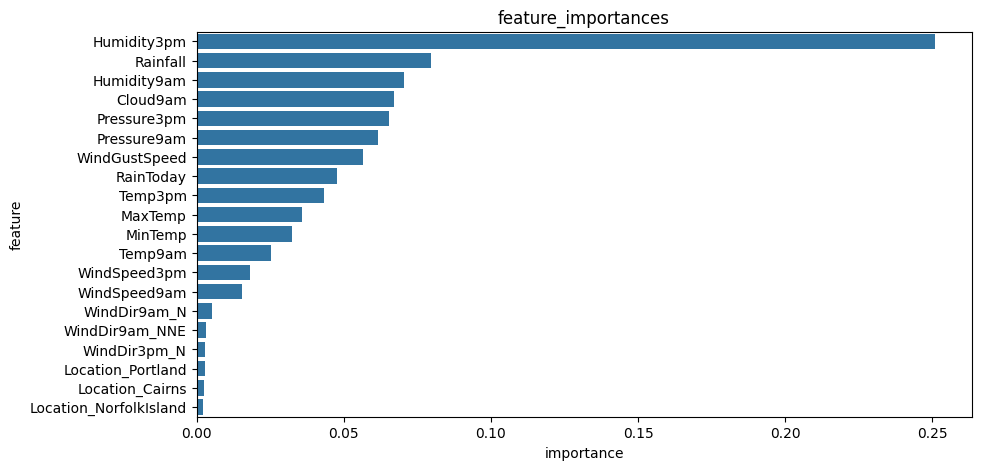

In [190]:
# Задание 4.12
# Как мы говорили в предыдущем юните, благодаря случайному лесу можно узнать, какие признаки оказывают большее влияние на целевую переменную по сравнению с другими
# Оцените значимость признаков
import matplotlib.pyplot as plt
import seaborn as sns

fi_df = pd.DataFrame({'importance': gs_rfc_best.feature_importances_,
                      'feature': gs_rfc_best.feature_names_in_})
fig = plt.figure(figsize=(10, 5))
sns.barplot(fi_df.sort_values(by='importance', ascending=False).head(20),
            y='feature',
            x='importance')
plt.title('feature_importances')
plt.show()

---